### Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Data

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
import io
import requests
url="https://app.tech1m.com/wp-content/uploads/2023/02/Supermarket_Sales.csv"
s=requests.get(url).content
df_raw=pd.read_csv(io.StringIO(s.decode('utf-8')))
df_raw.head()

,RowID,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cost_of_goods_sold,gross margin percentage,gross income,Rating,Year in City,Age,ProdID
0,0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,8,0-17,P001
1,1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,4,18-25,P002
2,2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,6,0-17,P003
3,3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,3,45-50,P001
4,4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,1,55+,P004


In [5]:
df_raw.columns.values

array(['RowID', 'Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total',
       'Date', 'Time', 'Payment', 'cost_of_goods_sold',
       'gross margin percentage', 'gross income', 'Rating',
       'Year in City', 'Age', 'ProdID'], dtype=object)

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RowID                    1000 non-null   int64  
 1   Invoice ID               1000 non-null   object 
 2   Branch                   1000 non-null   object 
 3   City                     1000 non-null   object 
 4   Customer type            1000 non-null   object 
 5   Gender                   1000 non-null   object 
 6   Product line             1000 non-null   object 
 7   Unit price               1000 non-null   float64
 8   Quantity                 1000 non-null   int64  
 9   Tax 5%                   1000 non-null   float64
 10  Total                    1000 non-null   float64
 11  Date                     1000 non-null   object 
 12  Time                     1000 non-null   object 
 13  Payment                  1000 non-null   object 
 14  cost_of_goods_sold       

In [7]:
df_raw.describe()

,RowID,Unit price,Quantity,Tax 5%,Total,cost_of_goods_sold,gross margin percentage,gross income,Rating,Year in City
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000
mean,499.500000,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,4.920000
std,288.819436,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,2.570644
min,0.000000,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000
25%,249.750000,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,3.000000
50%,499.500000,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,5.000000
75%,749.250000,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,7.000000
max,999.000000,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,9.000000


In [8]:
df=df_raw.copy()

## DATA EXPLORATION I

### Date Analysis

In [9]:
#convert date column to date time
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
#Extract date elements from the date column
df.loc[:, "Month"] = df.Date.dt.month
df.loc[:, "Year"] =  df.Date.dt.year
df.loc[:, "Day"] =  df.Date.dt.day
df.loc[:, "Quarter"] =  df.Date.dt.quarter
df.loc[:, "Day of Week"] =  df.Date.dt.dayofweek
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

In [11]:
#Mapping day of week
dayofweek_mapping = dict({0: "0-Monday", 
                         1: "1-Tuesday", 
                         2: "2-Wednesday" , 
                         3: "3-Thursday", 
                         4: "4-Friday", 
                         5: "5-Saturday", 
                         6: "6-Sunday"})

In [12]:
#renaming the data values using map function
df["Day of Week"] = df["Day of Week"].map(dayofweek_mapping)
df.head()

,RowID,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cost_of_goods_sold,gross margin percentage,gross income,Rating,Year in City,Age,ProdID,Month,Year,Day,Quarter,Day of Week,Hour
0,0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,8,0-17,P001,1,2019,5,1,5-Saturday,13
1,1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,4,18-25,P002,3,2019,8,1,4-Friday,10
2,2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,6,0-17,P003,3,2019,3,1,6-Sunday,13
3,3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,3,45-50,P001,1,2019,27,1,6-Sunday,20
4,4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,1,55+,P004,2,2019,8,1,4-Friday,10


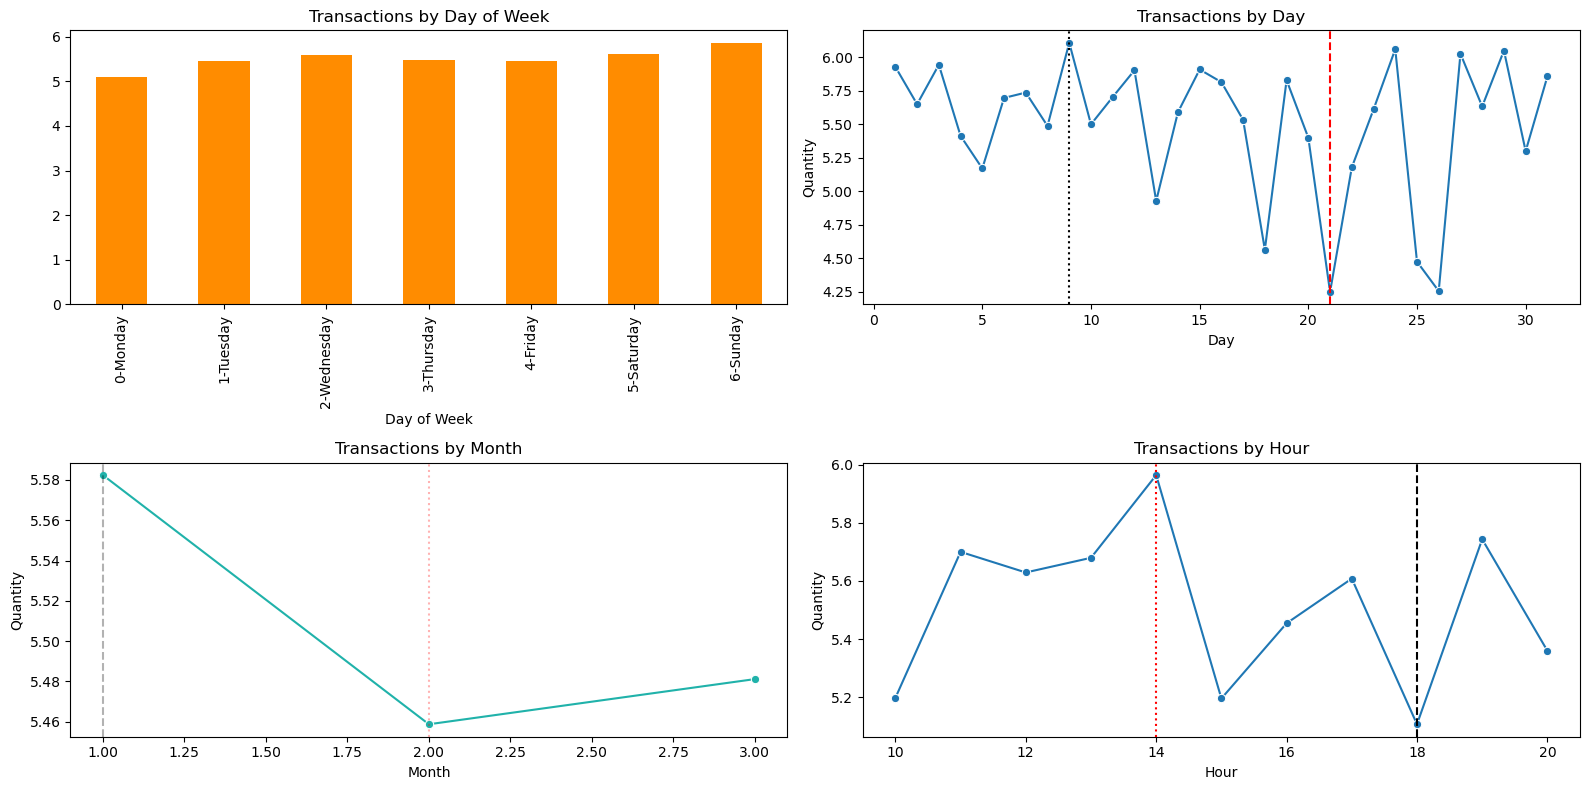

In [13]:
#Plotting the above data
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
df.groupby("Day of Week").mean()["Quantity"].plot(kind = "bar", color = "darkorange")
plt.title("Transactions by Day of Week")
plt.subplot(2,2,2)
sns.lineplot(x = "Day", y = "Quantity", data = df.groupby("Day").mean("Quantity"), marker = "o")
plt.axvline(21, color = 'r', linestyle = '--')
plt.axvline(9, color = 'k', linestyle = "dotted")
plt.title("Transactions by Day")
plt.subplot(2,2,3)
sns.lineplot(x = "Month", y = "Quantity", data = df.groupby("Month").mean("Quantity"), marker = "o", color = "lightseagreen")
plt.axvline(1, color = "k", linestyle = '--', alpha = 0.3)
plt.axvline(2, color = "r", linestyle = 'dotted', alpha = 0.3)
plt.title("Transactions by Month")
plt.subplot(2,2,4)
sns.lineplot(x = "Hour", y = "Quantity", data = df.groupby("Hour").mean("Quantity"), marker = "o")
plt.axvline(18, color = 'k', linestyle = '--')
plt.axvline(14, color = 'r', linestyle = "dotted")
plt.title("Transactions by Hour")
plt.tight_layout()
plt.show()


From The Time Series Analysis Above, 
1.  The data was collated over the span of the first 3 months in 2019.
2.  The Supermarket operate all through the day of the week and open daily between the hours of 10am to 8pm
3.  Averagely, Sales perform better on SUNDAYS
4.  More Quantity are sold at the second and fourth week of the month
5.  Peak sales period of the day is around mid-day (2pm) and the lowest is around 6pm.

### Total Sales Per City

<AxesSubplot:title={'center':'PRODUCT SALES PER CITY'}, xlabel='Product line', ylabel='Total Quantity'>

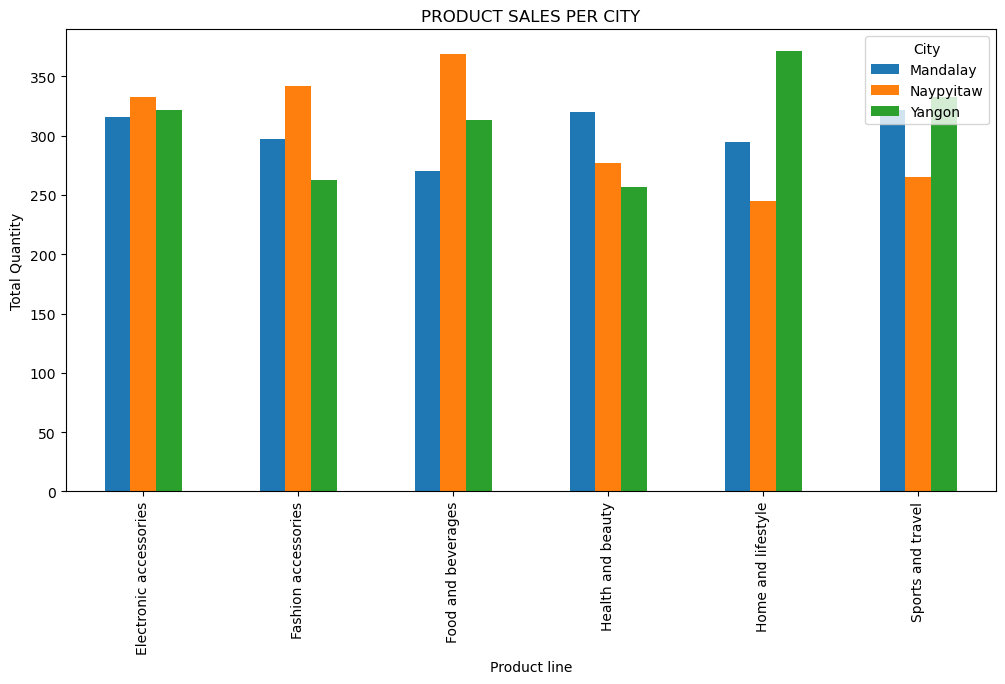

In [14]:
(df.pivot_table(index= 'Product line', columns='City', values=['Quantity'], aggfunc=sum)).plot(
    kind = 'bar',
    y = 'Quantity',
    figsize= (12,6),
    title= 'PRODUCT SALES PER CITY',
    ylabel= 'Total Quantity'
)

The Bar graph used to represent top product sales put
1. Sports and Travel Items as MANDALAY Best selling product,
2.  NAYPYITAW had Food and beverages as its top selling product,
3.  While, Home and Lifestyle product sold more in YANGON,
4. Averagely, Electronic accessories perform well across the city

In [15]:
df.groupby(["Customer type"])["Total"].sum().reset_index(name="Total")

,Customer type,Total
0,Member,164223.444
1,Normal,158743.305


### Influence of Membership Cards on Sale

Text(0.5, 1.0, 'Total Sales')

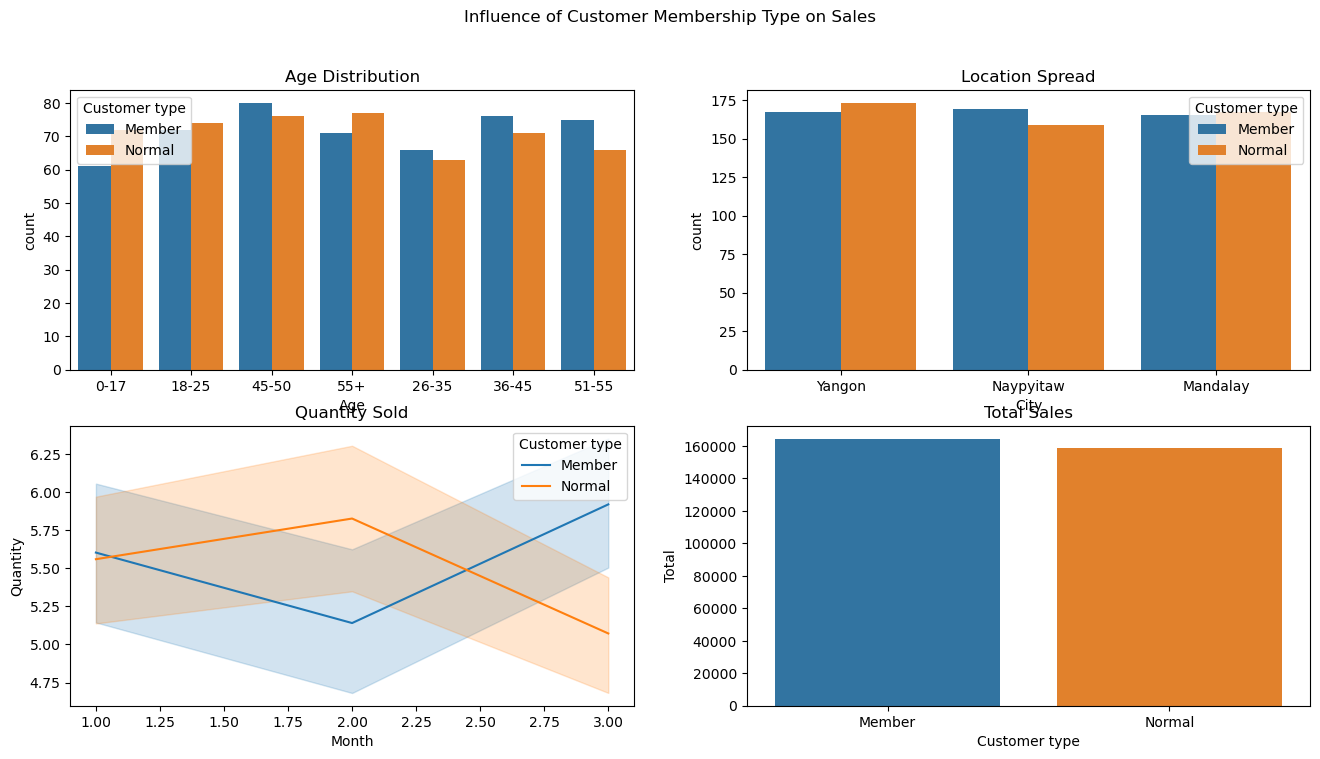

In [16]:
ct_age = df.pivot_table(index = "Age", columns = "Customer type", values= ["Quantity"], aggfunc="count")
ct_city = df.pivot_table(index = "City", columns = "Customer type", values=["Quantity"], aggfunc= "count")
ct_qsales = df.pivot_table(index = "Month", columns = "Customer type", values=["Quantity"], aggfunc= sum)
ct_sal_val = df.groupby(["Customer type"])["Total"].sum().reset_index(name="Total")

fig, axes = plt.subplots(2, 2, figsize=(16, 8))
fig.suptitle('Influence of Customer Membership Type on Sales')

# No of Customers and their age distribution
sns.countplot(ax=axes[0,0], data = df, x = "Age", hue="Customer type" )
axes[0,0].set_title("Age Distribution")

# Checking which city register more loyal customer
sns.countplot(ax=axes[0,1],data = df, x= "City", hue= "Customer type")
axes[0,1].set_title("Location Spread")

# Comparing monthly sales recorded for each customer type
sns.lineplot(ax=axes[1,0],data = df, x= "Month", y= "Quantity", hue= "Customer type")
axes[1,0].set_title("Quantity Sold")

# Sales Value for each customer type
sns.barplot(ax=axes[1,1],data = ct_sal_val, x= "Customer type", y= "Total")
axes[1,1].set_title("Total Sales")

From the Visualizations Above, the insight showed that;
1.  45-50 Age group had more loyal customers than other age group, 
2.  Only Naypyitaw had more loyal customers to ordinary customers ratios than others
3.  There seems to be increasing sales from loyal customers than ordinary customers
4.  As a result of 3 more revenue are generated from the loyal customers

### Analyzing Progress of the Payment Methods

Text(0.5, 1.0, 'City Store Payment Method')

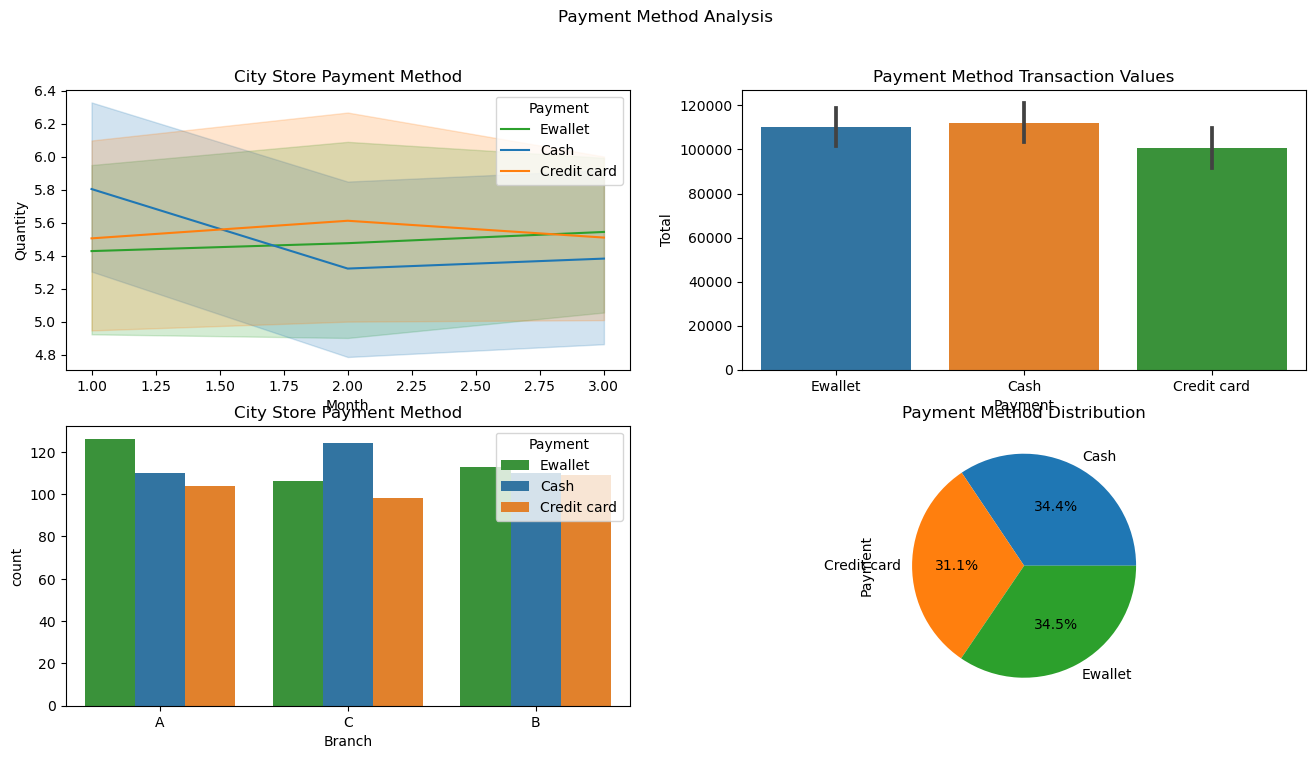

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
fig.suptitle('Payment Method Analysis')

# Number of Transactions conducted with each payment method
ax=axes[1,1]
(df.groupby(["Payment"])["Payment"].count().plot(kind = "pie", autopct='%1.1f%%'))
axes[1,1].set_title("Payment Method Distribution")

# Payment Method Distribution For Each Supermarket Branch
sns.countplot(ax=axes[1,0],data = df, x = "Branch", hue="Payment", palette={'Ewallet': 'tab:green','Cash': 'tab:blue','Credit card': 'tab:orange'})
axes[1,0].set_title("City Store Payment Method")

# Transaction Value of Each Payment Method
sns.barplot(ax=axes[0,1], data=df, x= "Payment", y="Total",estimator=sum, palette= ("tab:blue", "tab:orange", "tab:green"))
axes[0,1].set_title("Payment Method Transaction Values")

# Adoption Rate of Each Payment Method
sns.lineplot(ax=axes[0,0], data = df, x = "Month", y= "Quantity", hue="Payment", palette={'Ewallet': 'tab:green','Cash': 'tab:blue','Credit card': 'tab:orange'})
axes[0,0].set_title("City Store Payment Method")


Insights:
1.  The rate of supermarket e-wallet adoption is steadily increasing as against other method,
2.  Cash transactions still maintain the heaviest transaction value in compare to others but in terms of cash handling (merging credit and e-wallet as one), cashless transactions maintain better transaction value and quantity than cash transaction,
3.  Branch A has better e-wallet adoption progress than other branches.

## DATA EXPLORATION II

### Percentage Gender Distribution

In [18]:
df_gender = df.groupby(['Gender'])['Gender'].count().reset_index(name = 'Total')
df_gender['Percentage']= 100 * df_gender['Total']/df_gender['Total'].sum()
df_gender

,Gender,Total,Percentage
0,Female,501,50.1
1,Male,499,49.9


The result above showed a slightly better patronage from the female customers (50.1%) than the male customers 

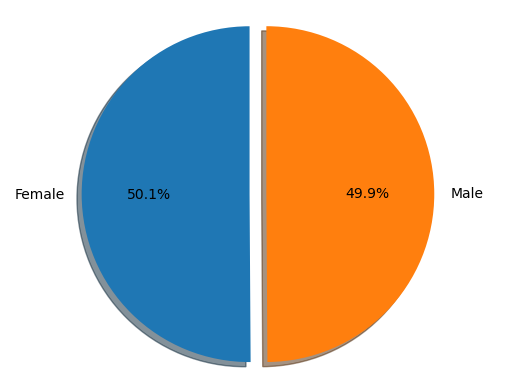

In [39]:
#Plotting The Pie Graph of the Gender Distribution
labels = df_gender["Gender"]
sizes = df_gender["Total"]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

### Age Distribution

In [31]:
df_age = df.groupby(['Age'])['Age'].count().reset_index(name='Total')
df_age

,Age,Total
0,0-17,133
1,18-25,146
2,26-35,129
3,36-45,147
4,45-50,156
5,51-55,141
6,55+,148


<AxesSubplot:xlabel='Age', ylabel='Count'>

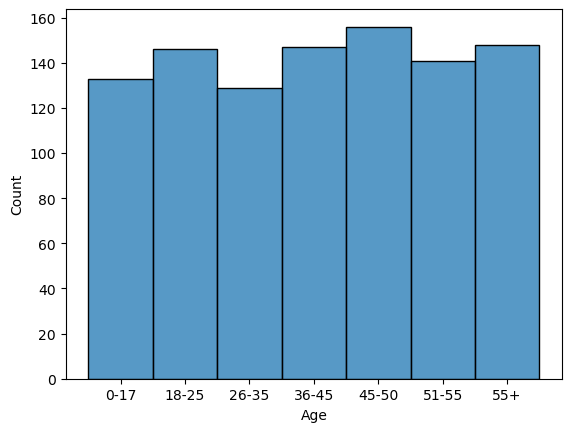

In [35]:
sns.histplot(data=df.sort_values("Age", ascending=True), x="Age")

Even though patronage is somewhat similar among all age groups, The Business experienced more patronage from customers within the 45-50 years age bracket.

### Customer Loyalty Distribution

In [ ]:
df_loyalty = df.groupby(['Customer type'])['Customer type'].count().reset_index(name = 'Total')
df_loyalty

,Customer type,Total
0,Member,501
1,Normal,499


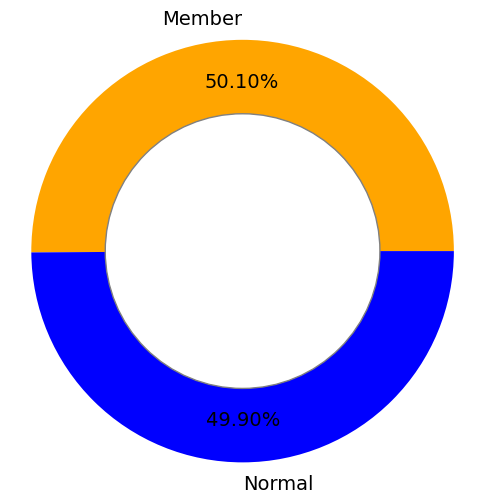

In [ ]:
plt.figure(figsize=(6, 6))
labels = df_loyalty['Customer type']
sizes = df_loyalty['Total']
colors = ['orange', 'blue']
textprops = {"fontsize":14,'color':'black'}
plt.pie(sizes, labels=labels, colors=colors,
 autopct= '%.2f%%',
 pctdistance =0.8,
 shadow=False,
 textprops =textprops,
 wedgeprops={'linewidth': 3.0},)
 
centre_circle = plt.Circle((0,0),0.65,color= 'grey', fc='white',linewidth=1.00)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

The Distribution Percentage of the Loyal Customers to Ordinary Customers Imitate that of the gender distribution with loyal customers taking a slight advantage over the normal customers.

### Popular Payment Methods

In [ ]:
df_payment = df.groupby(['Payment']).agg({'Payment': 'count', 'Total': 'sum'})
df_payment.columns = ['Total Transaction', 'Transaction Values']
df_payment

,Total Transaction,Transaction Values
Payment,,
Cash,344,112206.570
Credit card,311,100767.072
Ewallet,345,109993.107


In [47]:
df.groupby("Payment")["Payment"].count()

Payment
Cash           344
Credit card    311
Ewallet        345
Name: Payment, dtype: int64

Text(0.5, 1.0, 'Transaction Values')

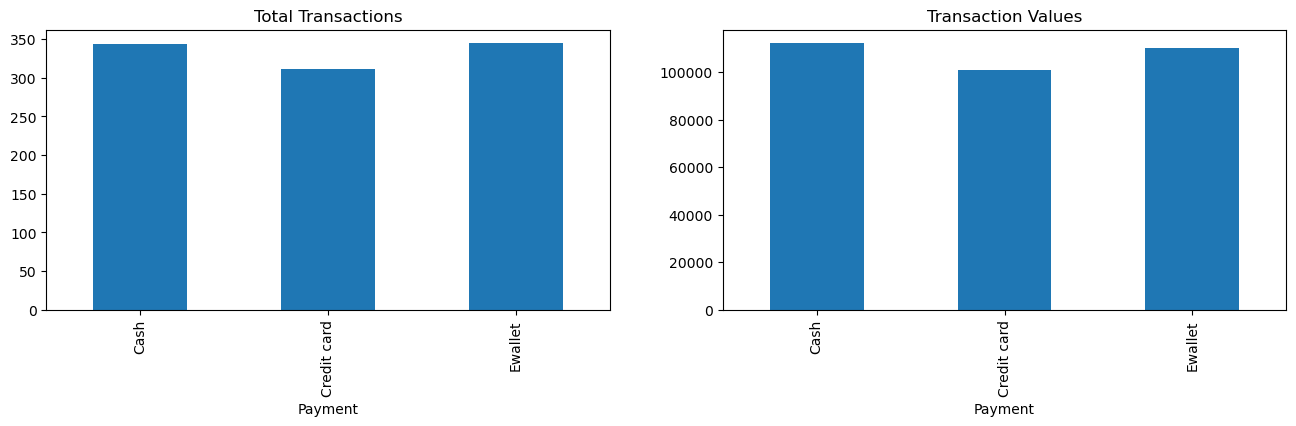

In [48]:

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
df.groupby("Payment")["Payment"].count().plot(kind = "bar")
plt.title("Total Transactions")
plt.subplot(2,2,2)
df.groupby("Payment").sum()["Total"].plot(kind = "bar")
plt.title("Transaction Values")

Note: From the table above, it is observe that the business's effort to reduce access to cash is successful so far with
major payment methods being the usage of credit card and e-wallet. Even though cash transactions brought in more revenue in transactions in compare to the other two, i believe it might be due to the provision of inemtives to encourage cashless payment (special discount) 

### Top Products

In [ ]:
df_prodline = df.groupby(['Product line']).agg({'Quantity': 'sum', 'Total': 'sum'}).sort_values(by = ['Quantity'])
df_prodline.columns = ['Total Quantity', 'Transaction Values']
df_prodline

,Total Quantity,Transaction Values
Product line,,
Health and beauty,854,49193.7390
Fashion accessories,902,54305.8950
Home and lifestyle,911,53861.9130
Sports and travel,920,55122.8265
Food and beverages,952,56144.8440
Electronic accessories,971,54337.5315


Even though Electronics Accessories experienced more quantity sales among all the product offered on the shelf, food and beverages generated more revenue in compare to other products.

### Top Branch Sales

In [49]:
df_branch = df.pivot_table(index='Branch', values= ['Total','Quantity'], aggfunc= ['sum'])
df_branch

sum             
       Quantity        Total
Branch                      
A          1859  106200.3705
B          1820  106197.6720
C          1831  110568.7065

Even Though Branch A experience more quantity sales in compare to other branches, Branch C and Even B averaged more sales per product than it.

### City Sales

In [50]:
df_city = df.pivot_table(index = 'City', columns = 'Customer type', values=['Quantity'], aggfunc=sum)
df_city

Quantity       
Customer type   Member Normal
City                         
Mandalay           924    896
Naypyitaw          897    934
Yangon             964    895

The City sales also follow the branch sales as Branch A, B and C are located in Mandalay, Naypyitaw and Yangon respectively. Taking Insigh from other perspectives, it is observed that, in compare to other city branches, only Naypyitaw had more product sales to ordinary customers than loyal customers

### Marketing Strategy

Based on the Analyzeed Data, The Following Reccommendations are suggested;
1.  The Loyalty Program should be further continue across the branches and special focus should be given to branch C through slightly higher discount offers to ensure meeting up with other branches in terms of customer conversions.
2.  More products line should be introduced across the store branches,
3. Introduction of Events like  weekly or monthly sales and promotions to drive traffic and Additionally, the supermarket could offer in-store events and workshops.

### Effect of Loyalty Card Issuance on Sales

Even though not every branch experience relatively more sales from its loyal customers in compare to the ordinary customers but overall sales (both in quantity and relative transaction values ) peaked from the Loyal customers in compare to the ordinary customers.